In [1]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import xlrd
import xlwt

# **Data Training**

In [2]:
#input dataframe training
df = pd.read_csv('salju_train.csv')

In [3]:
# Mengkonfigurasi, hanya ditampilkan beberapa dataset saja 
pd.set_option('display.max_rows', 20)
df

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32409,32410,18/11/2015,C10,13.2,20.0,0.0,8.0,10.3,NaN,NaN,NW,NaN,31.0,NaN,47.0,NaN,1010.7,1011.0,6.0,NaN,18.9,NaN,Tidak,Ya
32410,32411,06/12/2015,C15,13.9,29.8,0.0,NaN,NaN,SE,44.0,NNE,SE,24.0,24.0,34.0,35.0,1017.0,1015.4,8.0,7.0,24.5,27.8,Tidak,Tidak
32411,32412,15/04/2014,C32,9.8,18.9,0.0,4.0,10.5,SE,35.0,E,ESE,13.0,13.0,67.0,54.0,1023.7,1021.3,0.0,1.0,14.7,18.3,Tidak,Tidak
32412,32413,17/11/2012,C24,8.7,26.5,0.2,9.6,12.0,SSE,31.0,SE,S,17.0,13.0,53.0,20.0,1017.9,1014.5,8.0,2.0,14.7,24.5,Tidak,Tidak


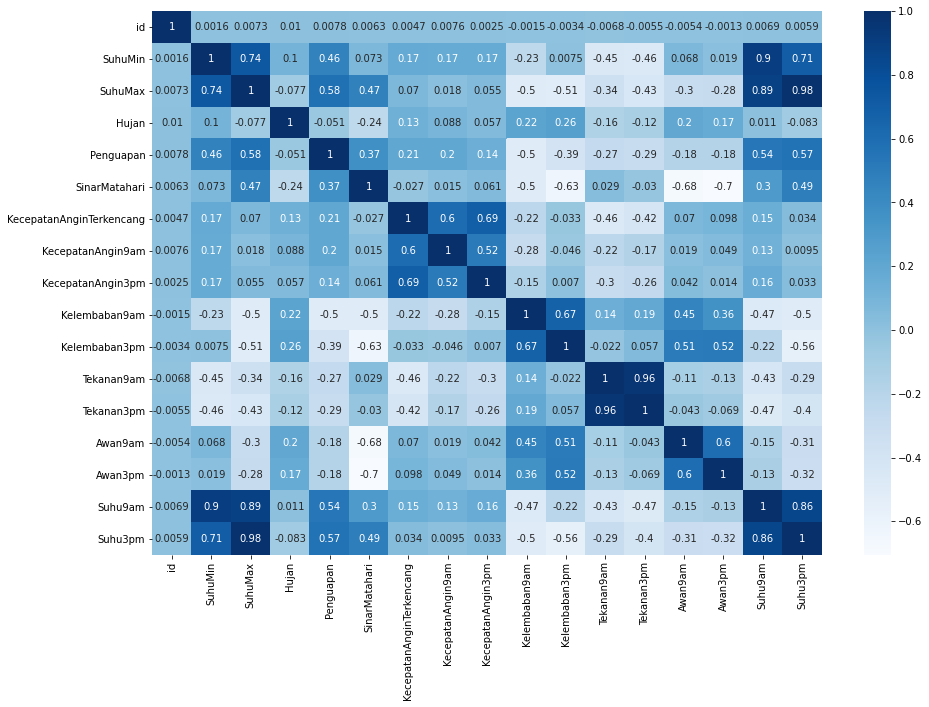

In [4]:
# Menampilkan korelasi antar atribut


plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [5]:
# Melakukan copy dataframe, hanya untuk beberapa atribut yang akan digunakan

prepared_data = df.loc[:,['Kelembaban3pm','Tekanan3pm','Suhu3pm','BersaljuBesok']]
pd.set_option('display.max_rows', 20)
prepared_data

,Kelembaban3pm,Tekanan3pm,Suhu3pm,BersaljuBesok
0,76.0,1018.5,15.0,Tidak
1,61.0,1014.6,15.5,Ya
2,42.0,NaN,29.6,Tidak
3,17.0,1016.9,23.2,Tidak
4,48.0,1014.7,18.1,Tidak
...,...,...,...,...
32409,NaN,1011.0,NaN,Ya
32410,35.0,1015.4,27.8,Tidak
32411,54.0,1021.3,18.3,Tidak
32412,20.0,1014.5,24.5,Tidak


In [6]:
# Menghilangkan missing data dan data yang redundant

prepared_data = prepared_data.dropna()
prepared_data = prepared_data.drop_duplicates(keep='first')
prepared_data

,Kelembaban3pm,Tekanan3pm,Suhu3pm,BersaljuBesok
0,76.0,1018.5,15.0,Tidak
1,61.0,1014.6,15.5,Ya
3,17.0,1016.9,23.2,Tidak
4,48.0,1014.7,18.1,Tidak
5,52.0,1012.5,21.1,Tidak
...,...,...,...,...
32406,35.0,1003.2,31.0,Tidak
32407,60.0,1020.9,12.6,Tidak
32410,35.0,1015.4,27.8,Tidak
32411,54.0,1021.3,18.3,Tidak


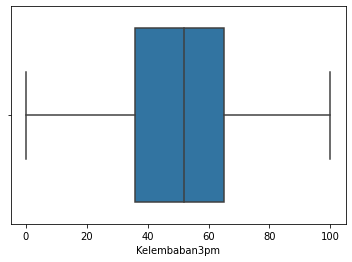

In [7]:
sns.boxplot(x=prepared_data['Kelembaban3pm'])

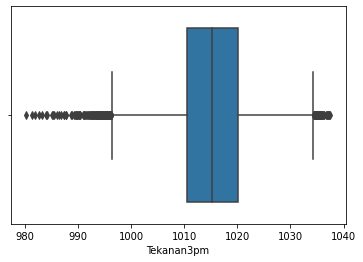

In [8]:
sns.boxplot(x=prepared_data['Tekanan3pm'])

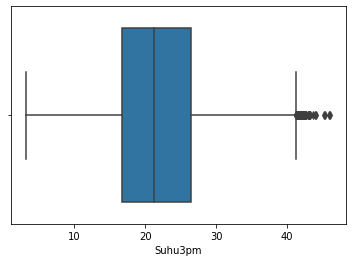

In [9]:
sns.boxplot(x=prepared_data['Suhu3pm'])

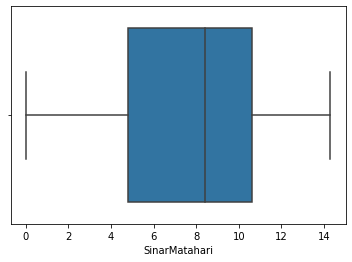

In [ ]:
# Menghilangkan data Quartil/outlers Fitur Penguapan
Q1 = prepared_data['Kelembaban3pm'].quantile(0.25)
Q3 = prepared_data['Kelembaban3pm'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_data['Kelembaban3pm'] >= Q1 - 1.5 * IQR) & (prepared_data['Kelembaban3pm'] <= Q3 + 1.5 *IQR)
prepared_data = prepared_data.loc[filter] 
sns.boxplot(x=prepared_data['Kelembaban3pm'])

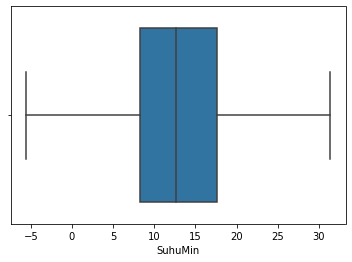

In [ ]:
# Menghilangkan data Quartil/outlers Fitur Suhu Min
Q1 = prepared_data['Tekanan3pm'].quantile(0.25)
Q3 = prepared_data['Tekanan3pm'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_data['Tekanan3pm'] >= Q1 - 1.5 * IQR) & (prepared_data['Tekanan3pm'] <= Q3 + 1.5 *IQR)
prepared_data = prepared_data.loc[filter] 
sns.boxplot(x=prepared_data['Tekanan3pm'])

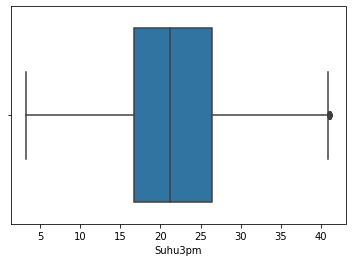

In [10]:
# Menghilangkan data Quartil/outlers Fitur Suhu Max
Q1 = prepared_data['Suhu3pm'].quantile(0.25)
Q3 = prepared_data['Suhu3pm'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_data['Suhu3pm'] >= Q1 - 1.5 * IQR) & (prepared_data['Suhu3pm'] <= Q3 + 1.5 *IQR)
prepared_data = prepared_data.loc[filter] 
sns.boxplot(x=prepared_data['Suhu3pm'])

In [11]:
prepared_data = prepared_data.reset_index(drop=True)
prepared_data


,Kelembaban3pm,Tekanan3pm,Suhu3pm,BersaljuBesok
0,76.0,1018.5,15.0,Tidak
1,61.0,1014.6,15.5,Ya
2,17.0,1016.9,23.2,Tidak
3,48.0,1014.7,18.1,Tidak
4,52.0,1012.5,21.1,Tidak
...,...,...,...,...
27832,35.0,1003.2,31.0,Tidak
27833,60.0,1020.9,12.6,Tidak
27834,35.0,1015.4,27.8,Tidak
27835,54.0,1021.3,18.3,Tidak


In [12]:
#Memisahkan Target Kelas
labelencoder = preprocessing.LabelEncoder()

prepared_data['BersaljuBesok'] = labelencoder.fit_transform(prepared_data['BersaljuBesok'])

prepared_data
Y_Training = prepared_data['BersaljuBesok'].values
print(Y_Training)

[0 1 0 ... 0 0 0]


In [13]:
prepared_data = prepared_data.drop(columns=['BersaljuBesok']) 

In [14]:
#Data Sebelum Normalisasi
prepared_data

,Kelembaban3pm,Tekanan3pm,Suhu3pm
0,76.0,1018.5,15.0
1,61.0,1014.6,15.5
2,17.0,1016.9,23.2
3,48.0,1014.7,18.1
4,52.0,1012.5,21.1
...,...,...,...
27832,35.0,1003.2,31.0
27833,60.0,1020.9,12.6
27834,35.0,1015.4,27.8
27835,54.0,1021.3,18.3


In [15]:
data = prepared_data
scaler = MinMaxScaler()
print(scaler.fit(data))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [16]:
X_training =scaler.transform(data)
print(X_training)

[[0.76       0.66841187 0.31052632]
 [0.61       0.60034904 0.32368421]
 [0.17       0.64048866 0.52631579]
 ...
 [0.35       0.61431065 0.64736842]
 [0.54       0.71727749 0.39736842]
 [0.2        0.59860384 0.56052632]]


# **Data Testing**

In [17]:
# Membaca dataset testing Salju dan memasukannya kedalam data frame
dftest = pd.read_csv('salju_test.csv')
# Mengkonfigurasi, hanya ditampilkan beberapa dataset saja 
pd.set_option('display.max_rows', 20)
dftest

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,14/11/2012,C40,7.8,25.8,0.0,8.0,13.2,NE,31.0,ENE,NW,22.0,13.0,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,No,No
18178,24/10/2015,C40,12.4,26.6,0.0,8.0,11.6,NW,37.0,NE,WNW,17.0,20.0,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,No,No
18179,31/08/2010,C21,6.7,22.9,0.0,NaN,NaN,NaN,NaN,NaN,NW,0.0,4.0,84.0,35.0,NaN,NaN,1.0,2.0,11.8,22.0,No,No
18180,24/08/2013,C12,12.5,26.7,0.0,9.0,10.8,NE,35.0,SW,ENE,2.0,26.0,56.0,45.0,1021.9,1018.1,5.0,5.0,22.9,25.4,No,No


In [18]:
# Melakukan copy dataframe, hanya untuk beberapa atribut yang akan digunakan

prepared_datatest = dftest.loc[:,['Kelembaban3pm','Tekanan3pm','Suhu3pm','BersaljuBesok']]
pd.set_option('display.max_rows', 20)
prepared_datatest

,Kelembaban3pm,Tekanan3pm,Suhu3pm,BersaljuBesok
0,56.0,1012.4,23.6,No
1,32.0,1015.2,18.9,Yes
2,27.0,1015.7,26.3,No
3,41.0,1008.6,26.4,No
4,95.0,NaN,6.0,No
...,...,...,...,...
18177,21.0,1014.2,24.0,No
18178,25.0,1018.7,25.7,No
18179,35.0,NaN,22.0,No
18180,45.0,1018.1,25.4,No


In [19]:
# Menghilangkan missing data dan data yang redundant

prepared_datatest = prepared_datatest.dropna()
prepared_datatest = prepared_datatest.drop_duplicates(keep='first')
prepared_datatest

,Kelembaban3pm,Tekanan3pm,Suhu3pm,BersaljuBesok
0,56.0,1012.4,23.6,No
1,32.0,1015.2,18.9,Yes
2,27.0,1015.7,26.3,No
3,41.0,1008.6,26.4,No
6,62.0,1019.1,12.3,Yes
...,...,...,...,...
18175,39.0,1015.4,21.1,No
18176,55.0,1028.5,18.5,No
18177,21.0,1014.2,24.0,No
18178,25.0,1018.7,25.7,No


In [20]:
# Menghilangkan Outliers/Kuartil Fitur Sinar Matahari
Q1 = prepared_datatest['Kelembaban3pm'].quantile(0.25)
Q3 = prepared_datatest['Kelembaban3pm'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_datatest['Kelembaban3pm'] >= Q1 - 1.5 * IQR) & (prepared_datatest['Kelembaban3pm'] <= Q3 + 1.5 *IQR)
prepared_datatest = prepared_datatest.loc[filter] 

In [21]:
# Menghilangkan Outliers/Kuartil Fitur SuhuMin
Q1 = prepared_datatest['Tekanan3pm'].quantile(0.25)
Q3 = prepared_datatest['Tekanan3pm'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_datatest['Tekanan3pm'] >= Q1 - 1.5 * IQR) & (prepared_datatest['Tekanan3pm'] <= Q3 + 1.5 *IQR)
prepared_datatest = prepared_datatest.loc[filter] 

In [22]:
# Menghilangkan Outliers/Kuartil Fitur SuhuMin
Q1 = prepared_datatest['Suhu3pm'].quantile(0.25)
Q3 = prepared_datatest['Suhu3pm'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_datatest['Suhu3pm'] >= Q1 - 1.5 * IQR) & (prepared_datatest['Suhu3pm'] <= Q3 + 1.5 *IQR)
prepared_datatest = prepared_datatest.loc[filter] 

In [23]:
#Memisahkan Target Kelas
labelencoder = preprocessing.LabelEncoder()

prepared_datatest['BersaljuBesok'] = labelencoder.fit_transform(prepared_datatest['BersaljuBesok'])

prepared_datatest
Y_Test = prepared_datatest['BersaljuBesok'].values
Y_Test

array([0, 1, 0, ..., 0, 0, 0])

In [24]:
prepared_datatest = prepared_datatest.drop(columns=['BersaljuBesok']) 

In [25]:
data1 = prepared_datatest
scaler = MinMaxScaler()
print(scaler.fit(data1))
X_Test = scaler.transform(data1)
print(X_Test)

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.55555556 0.42744063 0.52604167]
 [0.31313131 0.50131926 0.40364583]
 [0.26262626 0.51451187 0.59635417]
 ...
 [0.2020202  0.47493404 0.53645833]
 [0.24242424 0.59366755 0.58072917]
 [0.44444444 0.57783641 0.57291667]]


# **Klasifikasi dengan KNN**

In [26]:
# Import KNN Model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=27)
# Memasukkan data training pada fungsi klasifikasi KNN 
model.fit(X_training,Y_Training)
# Menentukan hasil prediksi dari x_test
y_pred = model.predict(X_Test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
#cek Hasil Kebenaran Prediksi dai Y_test
np.array(Y_Test)

array([0, 1, 0, ..., 0, 0, 0])

In [28]:
#Hitung Akurasi Kebenaran Data
from sklearn import metrics
print('Accuracy :', metrics.accuracy_score(Y_Test,y_pred)*100)

Accuracy : 81.35070937921294


In [29]:
# import confusion_matrix model
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_Test, y_pred)

array([[10710,  1428],
       [ 1477,  1962]])

In [30]:
# Merapikan hasil confusion matrix
y_actual1 = pd.Series(Y_Test, name = 'Aktual')
y_pred1 = pd.Series(y_pred, name = 'Prediksi')
hasil_confusion1 = pd.crosstab(y_actual1, y_pred1)
hasil_confusion1

Prediksi,0,1
Aktual,,
0,10710,1428
1,1477,1962


In [31]:
# Menghitung nilai akurasi dari klasifikasi KNN
from sklearn.metrics import classification_report
print(classification_report(Y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12138
           1       0.58      0.57      0.57      3439

    accuracy                           0.81     15577
   macro avg       0.73      0.73      0.73     15577
weighted avg       0.81      0.81      0.81     15577



In [32]:
# Simpan Prediksi Data KNN 
y_pred = pd.DataFrame((y_pred),columns=['Hasil Klasifikasi'])
y_pred.to_csv('data hasil Klasifikasi KNN.csv')

# **Klasifikasi Dengan Naive Bayes**

In [33]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [34]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
gnb = GaussianNB()

In [35]:
# Memasukkan data training pada fungsi klasifikasi naive bayes
gnb.fit(X_training,Y_Training)

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
# Menentukan hasil prediksi dari x_test
y_predd = gnb.predict(X_Test)
y_predd

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
#cek Hasil Kebenaran Prediksi dai Y_test
np.array(Y_Test)

array([0, 1, 0, ..., 0, 0, 0])

In [38]:
#Akurasi Kebenaran data
from sklearn import metrics
print('Accuracy :', metrics.accuracy_score(Y_Test,y_predd)*100)

Accuracy : 81.3828079861334


In [39]:
model.predict_proba(X_Test)

array([[0.62962963, 0.37037037],
       [0.92592593, 0.07407407],
       [0.96296296, 0.03703704],
       ...,
       [0.96296296, 0.03703704],
       [0.96296296, 0.03703704],
       [0.88888889, 0.11111111]])

In [40]:
# import confusion_matrix model
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_Test, y_predd)

array([[10567,  1571],
       [ 1329,  2110]])

In [41]:
# Merapikan hasil confusion matrix
y_actual1 = pd.Series(Y_Test, name = 'Actual')
y_pred1 = pd.Series(y_predd, name = 'prediction')
hasil_confusion2 = pd.crosstab(y_actual1, y_pred1)
hasil_confusion2

prediction,0,1
Actual,,
0,10567,1571
1,1329,2110


In [42]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
from sklearn.metrics import classification_report
print(classification_report(Y_Test, y_predd))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     12138
           1       0.57      0.61      0.59      3439

    accuracy                           0.81     15577
   macro avg       0.73      0.74      0.74     15577
weighted avg       0.82      0.81      0.82     15577



In [44]:
#Prediksi Data Naive Bayes
y_predd = pd.DataFrame((y_pred),columns=['Hasil Klasifikasi'])
y_predd.to_csv('data hasil Klasifikasi Naive Bayes.csv')